In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

/home/shaheer/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data = pd.read_csv("1.01. Simple linear regression.csv")

In [3]:
data.head(10)

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83
5,1670,2.91
6,1764,3.00
7,1764,3.00
8,1792,3.01
9,1850,3.01


In [4]:
data.describe()

,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


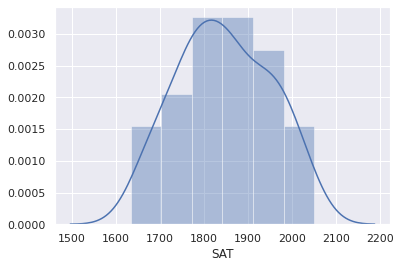

In [5]:
sns.distplot(data['SAT'])

Text(0, 0.5, 'GPA')

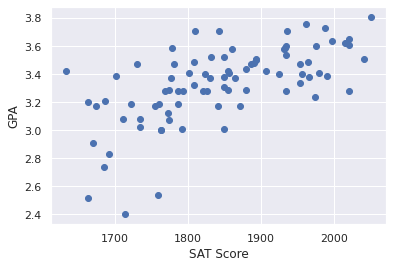

In [6]:
x = data['SAT']
y = data['GPA']
plt.scatter(x,y)
plt.xlabel("SAT Score")
plt.ylabel("GPA")

In [7]:
y_mean = data['GPA'].mean()

In [8]:
y_mean

3.330238095238094

In [9]:
data['Residuals'] = data['GPA'] - y_mean

In [10]:
data.head()

,SAT,GPA,Residuals
0,1714,2.40,-0.930238
1,1664,2.52,-0.810238
2,1760,2.54,-0.790238
3,1685,2.74,-0.590238
4,1693,2.83,-0.500238


In [13]:
data['Residual Square'] = data['Residuals']**2

In [14]:
data.head()

,SAT,GPA,Residuals,Residual Square
0,1714,2.40,-0.930238,0.865343
1,1664,2.52,-0.810238,0.656486
2,1760,2.54,-0.790238,0.624476
3,1685,2.74,-0.590238,0.348381
4,1693,2.83,-0.500238,0.250238


In [15]:
sum_square_residual = data['Residual Square'].sum()

In [17]:
x_mean = data['SAT'].mean()

In [18]:
x_mean

1845.2738095238096

### Formula of Regression
`y = m*x + b`
 where 
 m = slope 
 b = y-intercept

### Formula for slope
\begin{equation}
m = \frac{\sum(X_i – \bar{X}) (Y_i – \bar{Y})} {\sum(X_i – \bar{X})^2}
\end{equation}

In [20]:
data['SAT deviation'] = data['SAT'] - x_mean

In [21]:
data['GPA deviation'] = data['GPA'] - y_mean
data['Deviation product'] = data['SAT deviation'] * data['GPA deviation']
data['SAT deviation squared'] = data['SAT deviation']**2

In [22]:
data.head()

,SAT,GPA,Residuals,Residual Square,SAT deviation,GPA deviation,Deviation product,SAT deviation squared
0,1714,2.40,-0.930238,0.865343,-131.27381,-0.930238,122.115899,17232.813067
1,1664,2.52,-0.810238,0.656486,-181.27381,-0.810238,146.874946,32860.194019
2,1760,2.54,-0.790238,0.624476,-85.27381,-0.790238,67.386613,7271.622591
3,1685,2.74,-0.590238,0.348381,-160.27381,-0.590238,94.599708,25687.694019
4,1693,2.83,-0.500238,0.250238,-152.27381,-0.500238,76.173160,23187.313067


In [35]:
dev_prod = data['Deviation product'].sum()
sum_indep_square = data['SAT deviation squared'].sum()

In [36]:
m = dev_prod/sum_indep_square

In [37]:
print(m)

0.0016556880500928142


In [38]:
b = y_mean - (m*x_mean)
print(b)

0.27504029966027854


`GPA = 0.00165*SAT + 0.275`

In [41]:
import statsmodels.api as sm
x=sm.add_constant(x)
results=sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     56.05
Date:                Wed, 29 Apr 2020   Prob (F-statistic):           7.20e-11
Time:                        22:29:48   Log-Likelihood:                 12.672
No. Observations:                  84   AIC:                            -21.34
Df Residuals:                      82   BIC:                            -16.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2750      0.409      0.673      0.503      -0.538       1.088
SAT            0.0017      0.000      7.487      0.000       0.001       0.002
==============================================================================
Omnibus:                       12.839   Durbin-Watson:                   0.950
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.155
Skew:                          -0.722   Prob(JB):                     0.000310
Kurtosis:                       4.590   Cond. No.                     3.29e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [43]:
model.coef_

array([0.        , 0.00165569])

In [45]:
model.intercept_

0.2750402996602799